In [1]:
import urllib.request
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import pywt

In [2]:
def show(img):
    plt.figure(figsize = (10,10))
    plt.imshow(img, cmap="gray")

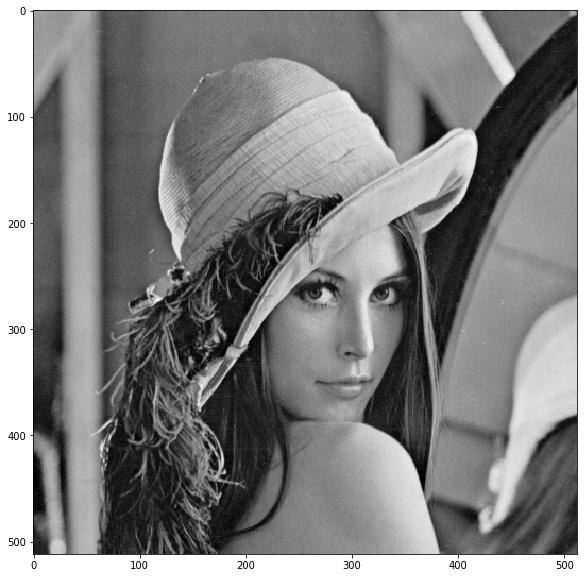

In [3]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
Y = Y.astype(np.float32)
show(Y)

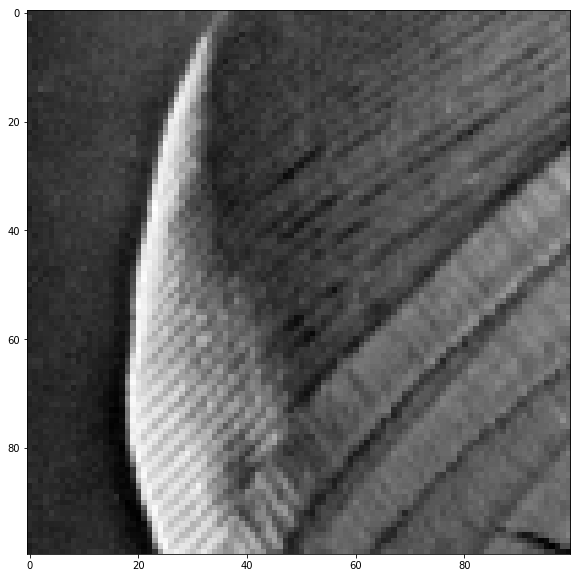

In [4]:
show(Y[100:200, 100:200])

In [5]:
print(Y)

[[162. 162. 162. ... 170. 155. 128.]
 [162. 162. 162. ... 170. 155. 128.]
 [162. 162. 162. ... 170. 155. 128.]
 ...
 [ 43.  43.  50. ... 104. 100.  98.]
 [ 44.  44.  55. ... 104. 105. 108.]
 [ 44.  44.  55. ... 104. 105. 108.]]


In [6]:
Y.max()

245.0

In [7]:
Y.min()

25.0

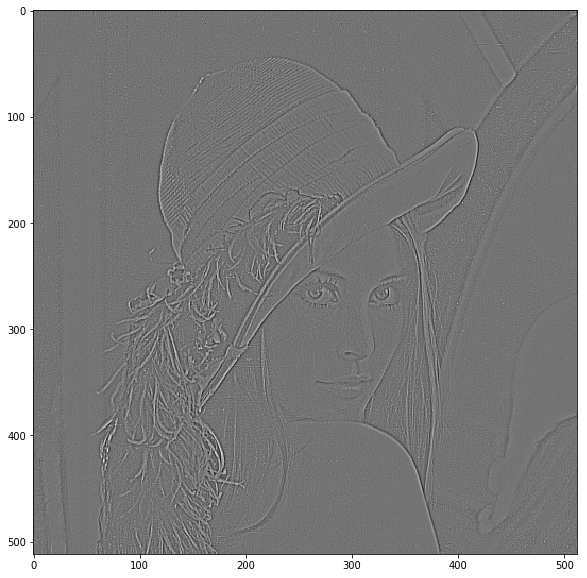

In [8]:
kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
high = cv2.filter2D(Y, -1, kernel)
show(high)

In [9]:
print(high)

[[   0.    0.    3. ...   42.   36. -162.]
 [   0.    0.    3. ...   42.   36. -162.]
 [   0.    0.    3. ...   42.   36. -162.]
 ...
 [ -12.  -34.   14. ...   23.  -15.  -26.]
 [   3.  -26.   40. ...   14.    9.   38.]
 [   0.  -33.   30. ...    9.   -6.   18.]]


In [10]:
high.max()

601.0

In [11]:
high.min()

-499.0

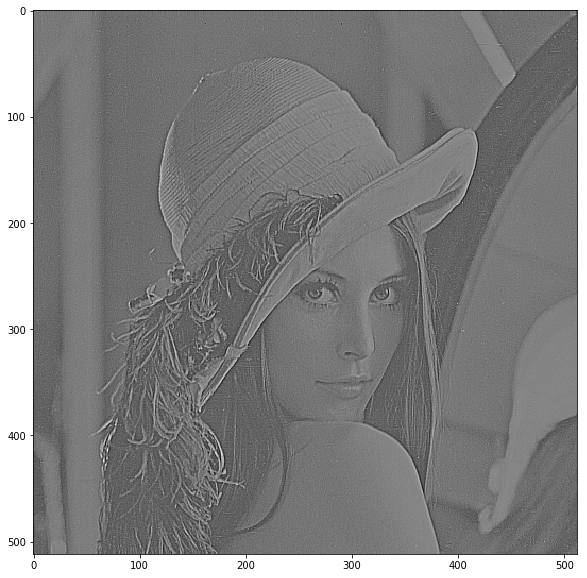

In [12]:
im = Y + high
plt.figure(figsize = (10,10))
plt.imshow(im, cmap="gray")

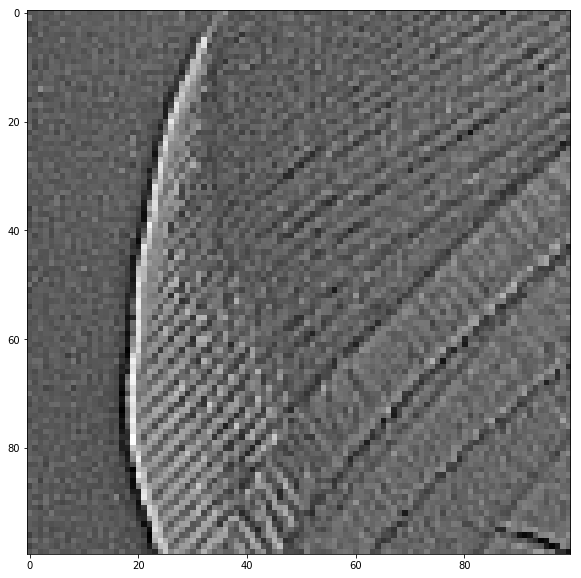

In [13]:
show(im[100:200, 100:200])

In [14]:
print(im)

[[162. 162. 165. ... 212. 191. -34.]
 [162. 162. 165. ... 212. 191. -34.]
 [162. 162. 165. ... 212. 191. -34.]
 ...
 [ 31.   9.  64. ... 127.  85.  72.]
 [ 47.  18.  95. ... 118. 114. 146.]
 [ 44.  11.  85. ... 113.  99. 126.]]


In [15]:
im.max()

798.0

In [16]:
im.min()

-421.0

In [17]:
wavelet = 'bior3.5'
L, H = pywt.dwt2(Y, wavelet, 'per')

In [18]:
zero = np.zeros((L.shape[0],L.shape[1]))

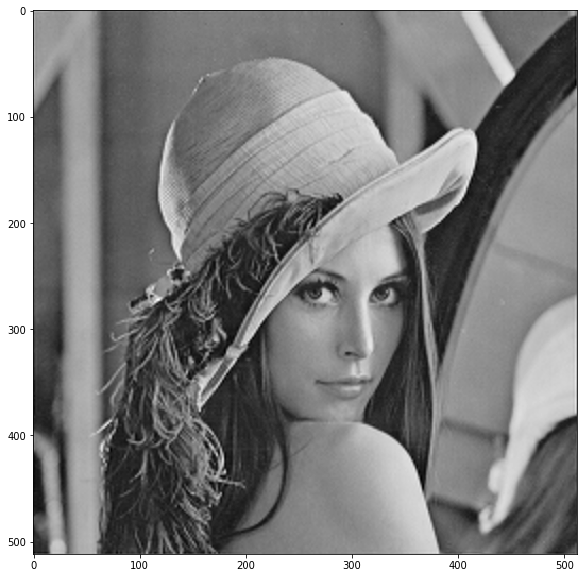

In [19]:
L_ = pywt.idwt2((L, (zero, zero, zero)), wavelet, 'per')
plt.figure(figsize = (10,10))
plt.imshow(L_, cmap="gray")

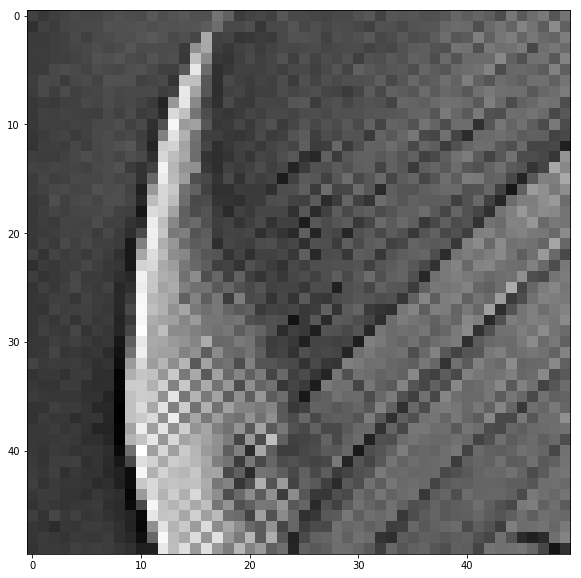

In [20]:
show(L[50:100, 50:100])

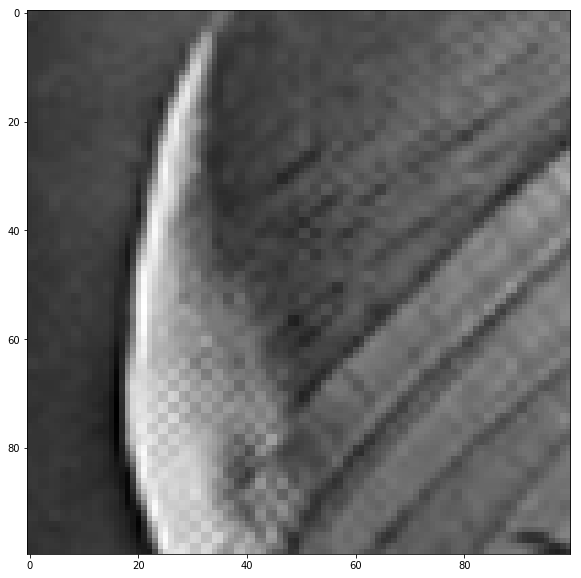

In [21]:
show(L_[100:200, 100:200])

In [22]:
print(L_)

[[140.47971809 144.51923788 145.37332928 ... 156.59793711 138.62750959
  133.25476992]
 [170.11770058 179.76912212 175.21457005 ... 175.30709553 147.99010372
  146.2603054 ]
 [157.74850273 164.05929661 162.85409069 ... 169.23496914 147.7505312
  143.92170906]
 ...
 [ 51.60769212  37.40549266  48.14904463 ... 102.56489658 107.74137783
   90.75564301]
 [ 39.21054661  22.60506213  40.92227352 ...  95.09648037 109.36737156
   90.73872697]
 [ 68.83455527  58.30964386  73.3303684  ... 113.10749388 119.66274881
  104.90510261]]


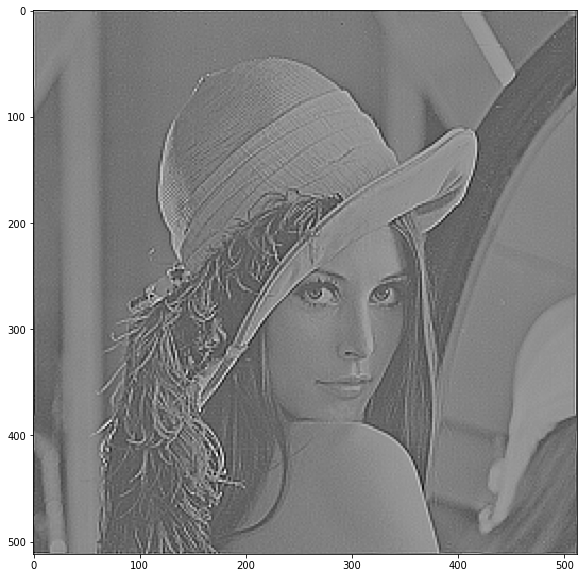

In [23]:
im = cv2.filter2D(L_, -1, kernel)
im = L_ + im
plt.figure(figsize = (10,10))
plt.imshow(im, cmap="gray")

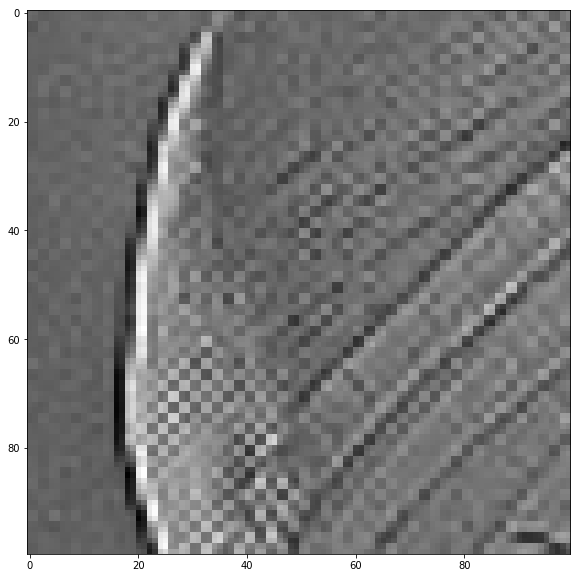

In [24]:
show(im[100:200, 100:200])

In [26]:
print(im)

[[ -84.0329026   -35.38269198  -36.7622056  ...   87.48368645
    18.67987001   37.55688441]
 [ 256.13577116  357.55565321  301.11127114 ...  289.56298542
   120.95610654  170.42998064]
 [  89.97204876  160.67525005  138.68459415 ...  209.45226192
   103.63506794  136.41234684]
 ...
 [ 156.4871304   -20.74622607   81.74658895 ...  114.84666204
   184.2030673    -6.24991536]
 [  -4.18772519 -214.32405794  -47.51253176 ...    4.83658314
   159.73387396  -52.55519927]
 [ 334.05036795  177.1461066   304.74470758 ...  200.76581287
   268.54698503   85.87348568]]


In [27]:
L, H = pywt.dwt2(im, wavelet, 'per')

In [28]:
H_ = pywt.idwt2((zero, H), wavelet, 'per')

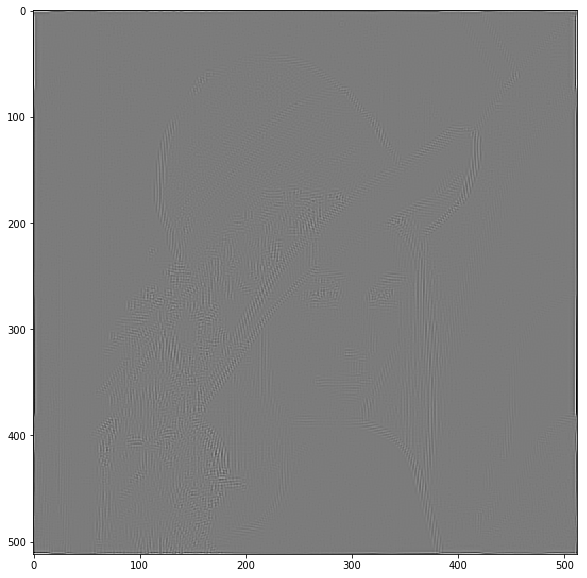

In [29]:
show((((H_-H_.min())/(H_.max()-H_.min())*255)).astype(np.uint8))

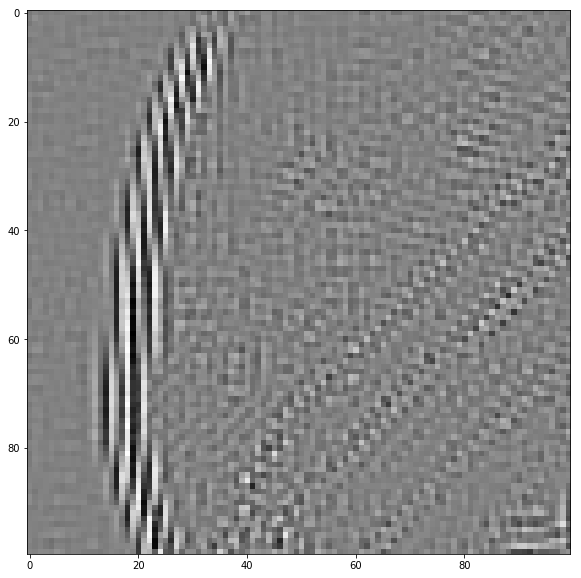

In [30]:
show(H_[100:200, 100:200])